In [1]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers.core import Dense, Activation, Dropout

from keras.layers import Input

from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from keras.utils import np_utils
 
from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.model_selection import KFold, train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

import matplotlib.pyplot as plt

import io

import os

from keras import regularizers

import time

from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau

from keras.models import Model, load_model

/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#chargement des donnees 

df = pd.read_csv('/home/kodzo.apedo/Bureau/Visu/Nouvelle_Base/14Classes.csv')

In [3]:
ds = df.values

In [4]:
RANDOM_SEED = 42 #used to help randomly select the data points
TEST_PCT = 0.10 

In [5]:
X = ds[:,0:34].astype(float)
Y = ds[:,34]

In [6]:
#Encodons la classe "Classe"

encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)

In [7]:
# Redefinissons nos classe

dummy_y = np_utils.to_categorical(encoder_Y)

In [8]:
Yd = dummy_y

In [9]:
X_train, X_test, Yd_train, Yd_test = train_test_split(X, Yd, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [10]:
nb_class = 14 # Nombre de classe

nb_epoch = 1000

batch_size = 1000

#Couche d'entrée

input_dim = X_train.shape[1] #numbre de colonne, 

encoding_dim = 500 # Dimension d'encodage

hidden_dim = encoding_dim - 200 #i.e. 7

hidden_dim2 = hidden_dim - 200

learning_rate = 1e-7

In [11]:

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation='relu', 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
#encoder = Dense(hidden_dim, activation='relu')(encoder)
#encoder = Dense(hidden_dim2, activation='relu')(encoder)
encoder = Dense(input_dim, activation='relu')(encoder)


In [12]:

autoencoder = Model(inputs=input_layer, outputs=encoder)

autoencoder.summary()

autoencoder.compile(metrics=['accuracy'],
                    loss='mse',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="ENCO_14C.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test), callbacks = [cp]).history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 34)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               17500     
_________________________________________________________________
dense_2 (Dense)              (None, 34)                17034     
Total params: 34,534
Trainable params: 34,534
Non-trainable params: 0
_________________________________________________________________
Train on 366012 samples, validate on 40669 samples
Epoch 1/1000
366012/366012 [==============================] - 11s 30us/step - loss: 0.4928 - acc: 0.7697 - val_loss: 0.1632 - val_acc: 0.8380
Epoch 2/1000
366012/366012 [==============================] - 11s 29us/step - loss: 0.1627 - acc: 0.8395 - val_loss: 0.1619 - val_acc: 0.8397
Epoch 3/1000
366012/366012 [==============================] - 11s 3

Epoch 53/1000
366012/366012 [==============================] - 10s 28us/step - loss: 0.1562 - acc: 0.9618 - val_loss: 0.1561 - val_acc: 0.9608
Epoch 54/1000
366012/366012 [==============================] - 10s 28us/step - loss: 0.1562 - acc: 0.9608 - val_loss: 0.1560 - val_acc: 0.9598
Epoch 55/1000
366012/366012 [==============================] - 10s 27us/step - loss: 0.1562 - acc: 0.9614 - val_loss: 0.1560 - val_acc: 0.9597
Epoch 56/1000
366012/366012 [==============================] - 10s 28us/step - loss: 0.1562 - acc: 0.9604 - val_loss: 0.1560 - val_acc: 0.9503
Epoch 57/1000
366012/366012 [==============================] - 10s 27us/step - loss: 0.1561 - acc: 0.9629 - val_loss: 0.1560 - val_acc: 0.9517
Epoch 58/1000
366012/366012 [==============================] - 10s 27us/step - loss: 0.1562 - acc: 0.9609 - val_loss: 0.1563 - val_acc: 0.9561
Epoch 59/1000
366012/366012 [==============================] - 10s 27us/step - loss: 0.1562 - acc: 0.9609 - val_loss: 0.1560 - val_acc: 0.9649

366012/366012 [==============================] - 11s 29us/step - loss: 0.1561 - acc: 0.9599 - val_loss: 0.1560 - val_acc: 0.9671
Epoch 111/1000
366012/366012 [==============================] - 11s 29us/step - loss: 0.1561 - acc: 0.9646 - val_loss: 0.1559 - val_acc: 0.9694
Epoch 112/1000
366012/366012 [==============================] - 11s 30us/step - loss: 0.1561 - acc: 0.9662 - val_loss: 0.1560 - val_acc: 0.9649
Epoch 113/1000
366012/366012 [==============================] - 11s 29us/step - loss: 0.1561 - acc: 0.9583 - val_loss: 0.1560 - val_acc: 0.9652
Epoch 114/1000
366012/366012 [==============================] - 11s 29us/step - loss: 0.1561 - acc: 0.9630 - val_loss: 0.1560 - val_acc: 0.9510
Epoch 115/1000
366012/366012 [==============================] - 11s 29us/step - loss: 0.1561 - acc: 0.9629 - val_loss: 0.1560 - val_acc: 0.9608
Epoch 116/1000
366012/366012 [==============================] - 10s 28us/step - loss: 0.1561 - acc: 0.9602 - val_loss: 0.1559 - val_acc: 0.9640
Epoch 1

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9631 - val_loss: 0.1559 - val_acc: 0.9589
Epoch 168/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9609 - val_loss: 0.1559 - val_acc: 0.9602
Epoch 169/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9629 - val_loss: 0.1559 - val_acc: 0.9599
Epoch 170/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9575 - val_loss: 0.1559 - val_acc: 0.9600
Epoch 171/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9626 - val_loss: 0.1559 - val_acc: 0.9524
Epoch 172/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9594 - val_loss: 0.1559 - val_acc: 0.9537
Epoch 173/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9625 - val_loss: 0.1559 - val_acc: 0.9568
Epoch 174/1000

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9647 - val_loss: 0.1560 - val_acc: 0.9641
Epoch 225/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9592 - val_loss: 0.1559 - val_acc: 0.9585
Epoch 226/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9593 - val_loss: 0.1559 - val_acc: 0.9560
Epoch 227/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9609 - val_loss: 0.1559 - val_acc: 0.9663
Epoch 228/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9628 - val_loss: 0.1560 - val_acc: 0.9538
Epoch 229/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9599 - val_loss: 0.1559 - val_acc: 0.9696
Epoch 230/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9655 - val_loss: 0.1559 - val_acc: 0.9690
Epoch 231/1000

366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9618 - val_loss: 0.1559 - val_acc: 0.9533
Epoch 282/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9626 - val_loss: 0.1559 - val_acc: 0.9678
Epoch 283/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9581 - val_loss: 0.1559 - val_acc: 0.9507
Epoch 284/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9597 - val_loss: 0.1559 - val_acc: 0.9701
Epoch 285/1000
366012/366012 [==============================] - 10s 26us/step - loss: 0.1560 - acc: 0.9660 - val_loss: 0.1559 - val_acc: 0.9632
Epoch 286/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9599 - val_loss: 0.1559 - val_acc: 0.9362
Epoch 287/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9603 - val_loss: 0.1563 - val_acc: 0.9444
Epoch 288/100

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9648 - val_loss: 0.1559 - val_acc: 0.9674
Epoch 339/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9647 - val_loss: 0.1561 - val_acc: 0.9542
Epoch 340/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9596 - val_loss: 0.1559 - val_acc: 0.9554
Epoch 341/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9593 - val_loss: 0.1559 - val_acc: 0.9496
Epoch 342/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9605 - val_loss: 0.1559 - val_acc: 0.9539
Epoch 343/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9568 - val_loss: 0.1559 - val_acc: 0.9582
Epoch 344/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9611 - val_loss: 0.1559 - val_acc: 0.9388
Epoch 345/1000

366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9628 - val_loss: 0.1559 - val_acc: 0.9564
Epoch 396/1000
366012/366012 [==============================] - 10s 26us/step - loss: 0.1560 - acc: 0.9568 - val_loss: 0.1559 - val_acc: 0.9546
Epoch 397/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9569 - val_loss: 0.1614 - val_acc: 0.9243
Epoch 398/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1563 - acc: 0.9565 - val_loss: 0.1559 - val_acc: 0.9708
Epoch 399/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9639 - val_loss: 0.1559 - val_acc: 0.9674
Epoch 400/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9645 - val_loss: 0.1559 - val_acc: 0.9560
Epoch 401/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9647 - val_loss: 0.1560 - val_acc: 0.9411
Epoch 402/100

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9673 - val_loss: 0.1559 - val_acc: 0.9652
Epoch 453/1000
366012/366012 [==============================] - 10s 26us/step - loss: 0.1560 - acc: 0.9627 - val_loss: 0.1559 - val_acc: 0.9681
Epoch 454/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9600 - val_loss: 0.1559 - val_acc: 0.9527
Epoch 455/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9615 - val_loss: 0.1559 - val_acc: 0.9628
Epoch 456/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1561 - acc: 0.9567 - val_loss: 0.1559 - val_acc: 0.9635
Epoch 457/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9635 - val_loss: 0.1559 - val_acc: 0.9630
Epoch 458/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9630 - val_loss: 0.1559 - val_acc: 0.9571
Epoch 459/100

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9646 - val_loss: 0.1559 - val_acc: 0.9604
Epoch 510/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9637 - val_loss: 0.1559 - val_acc: 0.9585
Epoch 511/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9605 - val_loss: 0.1559 - val_acc: 0.9531
Epoch 512/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9587 - val_loss: 0.1564 - val_acc: 0.9390
Epoch 513/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9539 - val_loss: 0.1563 - val_acc: 0.9533
Epoch 514/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9641 - val_loss: 0.1559 - val_acc: 0.9619
Epoch 515/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9643 - val_loss: 0.1559 - val_acc: 0.9718
Epoch 516/1000

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9568 - val_loss: 0.1559 - val_acc: 0.9584
Epoch 567/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9585 - val_loss: 0.1560 - val_acc: 0.9548
Epoch 568/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9590 - val_loss: 0.1559 - val_acc: 0.9591
Epoch 569/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9639 - val_loss: 0.1559 - val_acc: 0.9676
Epoch 570/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9612 - val_loss: 0.1559 - val_acc: 0.9586
Epoch 571/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9615 - val_loss: 0.1559 - val_acc: 0.9625
Epoch 572/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9636 - val_loss: 0.1605 - val_acc: 0.9239
Epoch 573/1000

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9566 - val_loss: 0.1559 - val_acc: 0.9519
Epoch 624/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9593 - val_loss: 0.1559 - val_acc: 0.9693
Epoch 625/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9606 - val_loss: 0.1559 - val_acc: 0.9621
Epoch 626/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9656 - val_loss: 0.1559 - val_acc: 0.9607
Epoch 627/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9520 - val_loss: 0.1560 - val_acc: 0.9546
Epoch 628/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9592 - val_loss: 0.1559 - val_acc: 0.9599
Epoch 629/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9661 - val_loss: 0.1559 - val_acc: 0.9727
Epoch 630/1000

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9588 - val_loss: 0.1559 - val_acc: 0.9653
Epoch 681/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9599 - val_loss: 0.1559 - val_acc: 0.9647
Epoch 682/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9591 - val_loss: 0.1559 - val_acc: 0.9550
Epoch 683/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9642 - val_loss: 0.1580 - val_acc: 0.9373
Epoch 684/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9617 - val_loss: 0.1559 - val_acc: 0.9574
Epoch 685/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9594 - val_loss: 0.1559 - val_acc: 0.9500
Epoch 686/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9589 - val_loss: 0.1559 - val_acc: 0.9731
Epoch 687/1000

366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9657 - val_loss: 0.1559 - val_acc: 0.9518
Epoch 738/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9619 - val_loss: 0.1559 - val_acc: 0.9652
Epoch 739/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9630 - val_loss: 0.1559 - val_acc: 0.9582
Epoch 740/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9611 - val_loss: 0.1559 - val_acc: 0.9570
Epoch 741/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9601 - val_loss: 0.1559 - val_acc: 0.9535
Epoch 742/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9576 - val_loss: 0.1560 - val_acc: 0.9574
Epoch 743/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9593 - val_loss: 0.1559 - val_acc: 0.9606
Epoch 744/1000

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9580 - val_loss: 0.1560 - val_acc: 0.9389
Epoch 795/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9600 - val_loss: 0.1559 - val_acc: 0.9597
Epoch 796/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9642 - val_loss: 0.1559 - val_acc: 0.9533
Epoch 797/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9560 - val_loss: 0.1559 - val_acc: 0.9568
Epoch 798/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9595 - val_loss: 0.1559 - val_acc: 0.9604
Epoch 799/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9637 - val_loss: 0.1560 - val_acc: 0.9614
Epoch 800/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9602 - val_loss: 0.1559 - val_acc: 0.9549
Epoch 801/1000

366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9611 - val_loss: 0.1559 - val_acc: 0.9618
Epoch 852/1000
366012/366012 [==============================] - 10s 26us/step - loss: 0.1560 - acc: 0.9670 - val_loss: 0.1559 - val_acc: 0.9656
Epoch 853/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9635 - val_loss: 0.1559 - val_acc: 0.9622
Epoch 854/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9638 - val_loss: 0.1559 - val_acc: 0.9589
Epoch 855/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9566 - val_loss: 0.1560 - val_acc: 0.9496
Epoch 856/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9568 - val_loss: 0.1559 - val_acc: 0.9623
Epoch 857/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9651 - val_loss: 0.1559 - val_acc: 0.9682
Epoch 858/100

366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9599 - val_loss: 0.1559 - val_acc: 0.9552
Epoch 909/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9636 - val_loss: 0.1559 - val_acc: 0.9561
Epoch 910/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9588 - val_loss: 0.1559 - val_acc: 0.9524
Epoch 911/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9629 - val_loss: 0.1559 - val_acc: 0.9619
Epoch 912/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9576 - val_loss: 0.1559 - val_acc: 0.9648
Epoch 913/1000
366012/366012 [==============================] - 9s 26us/step - loss: 0.1560 - acc: 0.9666 - val_loss: 0.1558 - val_acc: 0.9652
Epoch 914/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9544 - val_loss: 0.1560 - val_acc: 0.9377
Epoch 915/1000

366012/366012 [==============================] - 9s 25us/step - loss: 0.1561 - acc: 0.9544 - val_loss: 0.1559 - val_acc: 0.9599
Epoch 966/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9636 - val_loss: 0.1559 - val_acc: 0.9554
Epoch 967/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9608 - val_loss: 0.1559 - val_acc: 0.9569
Epoch 968/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9580 - val_loss: 0.1572 - val_acc: 0.9451
Epoch 969/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9604 - val_loss: 0.1559 - val_acc: 0.9583
Epoch 970/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9569 - val_loss: 0.1559 - val_acc: 0.9509
Epoch 971/1000
366012/366012 [==============================] - 9s 25us/step - loss: 0.1560 - acc: 0.9566 - val_loss: 0.1559 - val_acc: 0.9534
Epoch 972/1000

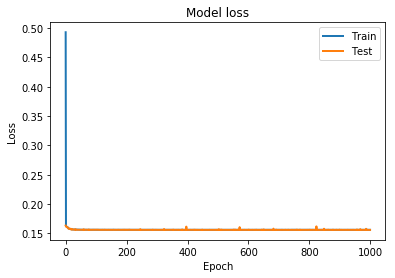

In [13]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

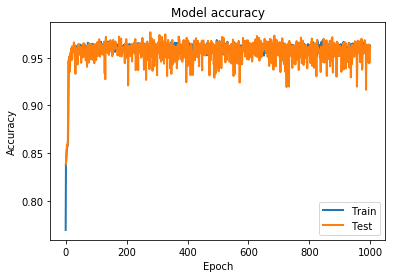

In [14]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [15]:

model = Sequential()

model.add(autoencoder)
model.add(Dense(700, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(500, activation ='relu'))
#model.add(Dropout(0.3))
model.add(Dense(300, activation ='relu'))
#model.add(Dropout(0.2))
model.add(Dense(100, activation ='relu'))
#model.add(Dropout(0.1))
model.add(Dense(nb_class, activation ='sigmoid'))

model.compile(metrics=['accuracy'], loss = 'mse', 
              optimizer='adam')

model.summary()

checkpointer = ModelCheckpoint(filepath='14Classes.h5', 
                               verbose=2, save_best_only=True)


history = model.fit(X_train, Yd_train,
             validation_data=(X_test, Yd_test),
             epochs= nb_epoch,
             batch_size=batch_size,
             shuffle=True,
             verbose=2, callbacks=[checkpointer]).history

score, acc = model.evaluate(X_test, y = Yd_test, 
               batch_size = batch_size, 
               verbose = 1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 34)                34534     
_________________________________________________________________
dense_3 (Dense)              (None, 700)               24500     
_________________________________________________________________
dense_4 (Dense)              (None, 500)               350500    
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 14)                1414      
Total params: 591,348
Trainable params: 591,348
Non-trainable params: 0
_________________________________________________________________
Trai

 - 31s - loss: 0.0103 - acc: 0.8715 - val_loss: 0.0175 - val_acc: 0.8179

Epoch 00046: val_loss did not improve from 0.00977
Epoch 47/1000
 - 31s - loss: 0.0103 - acc: 0.8712 - val_loss: 0.0102 - val_acc: 0.8731

Epoch 00047: val_loss did not improve from 0.00977
Epoch 48/1000
 - 31s - loss: 0.0101 - acc: 0.8726 - val_loss: 0.0099 - val_acc: 0.8749

Epoch 00048: val_loss did not improve from 0.00977
Epoch 49/1000
 - 30s - loss: 0.0098 - acc: 0.8744 - val_loss: 0.0163 - val_acc: 0.8235

Epoch 00049: val_loss did not improve from 0.00977
Epoch 50/1000
 - 31s - loss: 0.0106 - acc: 0.8695 - val_loss: 0.0101 - val_acc: 0.8725

Epoch 00050: val_loss did not improve from 0.00977
Epoch 51/1000
 - 31s - loss: 0.0099 - acc: 0.8740 - val_loss: 0.0100 - val_acc: 0.8744

Epoch 00051: val_loss did not improve from 0.00977
Epoch 52/1000
 - 30s - loss: 0.0097 - acc: 0.8756 - val_loss: 0.0097 - val_acc: 0.8764

Epoch 00052: val_loss improved from 0.00977 to 0.00969, saving model to 14Classes.h5
Epoch 5


Epoch 00102: val_loss did not improve from 0.00328
Epoch 103/1000
 - 31s - loss: 0.0032 - acc: 0.9648 - val_loss: 0.0037 - val_acc: 0.9622

Epoch 00103: val_loss did not improve from 0.00328
Epoch 104/1000
 - 31s - loss: 0.0034 - acc: 0.9636 - val_loss: 0.0039 - val_acc: 0.9604

Epoch 00104: val_loss did not improve from 0.00328
Epoch 105/1000
 - 31s - loss: 0.0034 - acc: 0.9629 - val_loss: 0.0034 - val_acc: 0.9639

Epoch 00105: val_loss did not improve from 0.00328
Epoch 106/1000
 - 31s - loss: 0.0033 - acc: 0.9645 - val_loss: 0.0034 - val_acc: 0.9634

Epoch 00106: val_loss did not improve from 0.00328
Epoch 107/1000
 - 31s - loss: 0.0034 - acc: 0.9628 - val_loss: 0.0030 - val_acc: 0.9661

Epoch 00107: val_loss improved from 0.00328 to 0.00300, saving model to 14Classes.h5
Epoch 108/1000
 - 31s - loss: 0.0031 - acc: 0.9659 - val_loss: 0.0030 - val_acc: 0.9682

Epoch 00108: val_loss improved from 0.00300 to 0.00296, saving model to 14Classes.h5
Epoch 109/1000
 - 31s - loss: 0.0036 - a


Epoch 00158: val_loss did not improve from 0.00193
Epoch 159/1000
 - 31s - loss: 0.0020 - acc: 0.9798 - val_loss: 0.0025 - val_acc: 0.9758

Epoch 00159: val_loss did not improve from 0.00193
Epoch 160/1000
 - 31s - loss: 0.0020 - acc: 0.9803 - val_loss: 0.0029 - val_acc: 0.9732

Epoch 00160: val_loss did not improve from 0.00193
Epoch 161/1000
 - 31s - loss: 0.0020 - acc: 0.9794 - val_loss: 0.0024 - val_acc: 0.9761

Epoch 00161: val_loss did not improve from 0.00193
Epoch 162/1000
 - 30s - loss: 0.0018 - acc: 0.9809 - val_loss: 0.0019 - val_acc: 0.9797

Epoch 00162: val_loss did not improve from 0.00193
Epoch 163/1000
 - 31s - loss: 0.0019 - acc: 0.9806 - val_loss: 0.0043 - val_acc: 0.9624

Epoch 00163: val_loss did not improve from 0.00193
Epoch 164/1000
 - 31s - loss: 0.0033 - acc: 0.9660 - val_loss: 0.0029 - val_acc: 0.9705

Epoch 00164: val_loss did not improve from 0.00193
Epoch 165/1000
 - 30s - loss: 0.0026 - acc: 0.9718 - val_loss: 0.0027 - val_acc: 0.9706

Epoch 00165: val_lo


Epoch 00216: val_loss did not improve from 0.00144
Epoch 217/1000
 - 31s - loss: 0.0017 - acc: 0.9835 - val_loss: 0.0022 - val_acc: 0.9795

Epoch 00217: val_loss did not improve from 0.00144
Epoch 218/1000
 - 31s - loss: 0.0017 - acc: 0.9837 - val_loss: 0.0017 - val_acc: 0.9836

Epoch 00218: val_loss did not improve from 0.00144
Epoch 219/1000
 - 31s - loss: 0.0015 - acc: 0.9849 - val_loss: 0.0017 - val_acc: 0.9835

Epoch 00219: val_loss did not improve from 0.00144
Epoch 220/1000
 - 31s - loss: 0.0014 - acc: 0.9852 - val_loss: 0.0020 - val_acc: 0.9805

Epoch 00220: val_loss did not improve from 0.00144
Epoch 221/1000
 - 32s - loss: 0.0017 - acc: 0.9835 - val_loss: 0.0018 - val_acc: 0.9822

Epoch 00221: val_loss did not improve from 0.00144
Epoch 222/1000
 - 31s - loss: 0.0014 - acc: 0.9857 - val_loss: 0.0019 - val_acc: 0.9814

Epoch 00222: val_loss did not improve from 0.00144
Epoch 223/1000
 - 31s - loss: 0.0016 - acc: 0.9842 - val_loss: 0.0019 - val_acc: 0.9821

Epoch 00223: val_lo

 - 31s - loss: 0.0016 - acc: 0.9852 - val_loss: 0.0018 - val_acc: 0.9836

Epoch 00275: val_loss did not improve from 0.00133
Epoch 276/1000
 - 31s - loss: 0.0014 - acc: 0.9868 - val_loss: 0.0012 - val_acc: 0.9890

Epoch 00276: val_loss improved from 0.00133 to 0.00122, saving model to 14Classes.h5
Epoch 277/1000
 - 31s - loss: 0.0010 - acc: 0.9899 - val_loss: 0.0015 - val_acc: 0.9866

Epoch 00277: val_loss did not improve from 0.00122
Epoch 278/1000
 - 31s - loss: 0.0012 - acc: 0.9888 - val_loss: 0.0018 - val_acc: 0.9836

Epoch 00278: val_loss did not improve from 0.00122
Epoch 279/1000
 - 31s - loss: 0.0013 - acc: 0.9875 - val_loss: 0.0012 - val_acc: 0.9885

Epoch 00279: val_loss did not improve from 0.00122
Epoch 280/1000
 - 31s - loss: 0.0014 - acc: 0.9875 - val_loss: 0.0020 - val_acc: 0.9831

Epoch 00280: val_loss did not improve from 0.00122
Epoch 281/1000
 - 31s - loss: 0.0016 - acc: 0.9859 - val_loss: 0.0014 - val_acc: 0.9871

Epoch 00281: val_loss did not improve from 0.00122
E


Epoch 00332: val_loss did not improve from 0.00106
Epoch 333/1000
 - 32s - loss: 0.0015 - acc: 0.9847 - val_loss: 0.0022 - val_acc: 0.9796

Epoch 00333: val_loss did not improve from 0.00106
Epoch 334/1000
 - 31s - loss: 0.0017 - acc: 0.9836 - val_loss: 0.0018 - val_acc: 0.9828

Epoch 00334: val_loss did not improve from 0.00106
Epoch 335/1000
 - 31s - loss: 0.0016 - acc: 0.9840 - val_loss: 0.0018 - val_acc: 0.9825

Epoch 00335: val_loss did not improve from 0.00106
Epoch 336/1000
 - 32s - loss: 0.0016 - acc: 0.9847 - val_loss: 0.0019 - val_acc: 0.9819

Epoch 00336: val_loss did not improve from 0.00106
Epoch 337/1000
 - 32s - loss: 0.0020 - acc: 0.9819 - val_loss: 0.0020 - val_acc: 0.9809

Epoch 00337: val_loss did not improve from 0.00106
Epoch 338/1000
 - 31s - loss: 0.0017 - acc: 0.9835 - val_loss: 0.0018 - val_acc: 0.9824

Epoch 00338: val_loss did not improve from 0.00106
Epoch 339/1000
 - 31s - loss: 0.0015 - acc: 0.9847 - val_loss: 0.0021 - val_acc: 0.9803

Epoch 00339: val_lo


Epoch 00391: val_loss did not improve from 0.00106
Epoch 392/1000
 - 31s - loss: 0.0012 - acc: 0.9889 - val_loss: 0.0013 - val_acc: 0.9884

Epoch 00392: val_loss did not improve from 0.00106
Epoch 393/1000
 - 31s - loss: 0.0011 - acc: 0.9903 - val_loss: 0.0012 - val_acc: 0.9891

Epoch 00393: val_loss did not improve from 0.00106
Epoch 394/1000
 - 31s - loss: 0.0012 - acc: 0.9895 - val_loss: 0.0019 - val_acc: 0.9840

Epoch 00394: val_loss did not improve from 0.00106
Epoch 395/1000
 - 31s - loss: 0.0011 - acc: 0.9898 - val_loss: 0.0014 - val_acc: 0.9880

Epoch 00395: val_loss did not improve from 0.00106
Epoch 396/1000
 - 31s - loss: 0.0010 - acc: 0.9907 - val_loss: 0.0012 - val_acc: 0.9886

Epoch 00396: val_loss did not improve from 0.00106
Epoch 397/1000
 - 31s - loss: 0.0011 - acc: 0.9898 - val_loss: 0.0014 - val_acc: 0.9875

Epoch 00397: val_loss did not improve from 0.00106
Epoch 398/1000
 - 31s - loss: 0.0012 - acc: 0.9891 - val_loss: 0.0015 - val_acc: 0.9876

Epoch 00398: val_lo


Epoch 00450: val_loss did not improve from 0.00106
Epoch 451/1000
 - 31s - loss: 0.0012 - acc: 0.9902 - val_loss: 0.0011 - val_acc: 0.9903

Epoch 00451: val_loss did not improve from 0.00106
Epoch 452/1000
 - 31s - loss: 0.0012 - acc: 0.9897 - val_loss: 0.0015 - val_acc: 0.9873

Epoch 00452: val_loss did not improve from 0.00106
Epoch 453/1000
 - 31s - loss: 0.0013 - acc: 0.9894 - val_loss: 0.0015 - val_acc: 0.9872

Epoch 00453: val_loss did not improve from 0.00106
Epoch 454/1000
 - 32s - loss: 0.0011 - acc: 0.9907 - val_loss: 0.0016 - val_acc: 0.9866

Epoch 00454: val_loss did not improve from 0.00106
Epoch 455/1000
 - 31s - loss: 0.0013 - acc: 0.9890 - val_loss: 0.0017 - val_acc: 0.9862

Epoch 00455: val_loss did not improve from 0.00106
Epoch 456/1000
 - 31s - loss: 0.0013 - acc: 0.9892 - val_loss: 0.0014 - val_acc: 0.9880

Epoch 00456: val_loss did not improve from 0.00106
Epoch 457/1000
 - 31s - loss: 0.0013 - acc: 0.9891 - val_loss: 0.0014 - val_acc: 0.9883

Epoch 00457: val_lo


Epoch 00508: val_loss did not improve from 0.00101
Epoch 509/1000
 - 31s - loss: 0.0011 - acc: 0.9916 - val_loss: 0.0014 - val_acc: 0.9880

Epoch 00509: val_loss did not improve from 0.00101
Epoch 510/1000
 - 31s - loss: 0.0012 - acc: 0.9898 - val_loss: 0.0020 - val_acc: 0.9841

Epoch 00510: val_loss did not improve from 0.00101
Epoch 511/1000
 - 31s - loss: 0.0014 - acc: 0.9885 - val_loss: 0.0011 - val_acc: 0.9902

Epoch 00511: val_loss did not improve from 0.00101
Epoch 512/1000
 - 31s - loss: 0.0011 - acc: 0.9903 - val_loss: 0.0012 - val_acc: 0.9893

Epoch 00512: val_loss did not improve from 0.00101
Epoch 513/1000
 - 31s - loss: 9.7244e-04 - acc: 0.9915 - val_loss: 0.0010 - val_acc: 0.9912

Epoch 00513: val_loss did not improve from 0.00101
Epoch 514/1000
 - 31s - loss: 9.1117e-04 - acc: 0.9921 - val_loss: 0.0012 - val_acc: 0.9898

Epoch 00514: val_loss did not improve from 0.00101
Epoch 515/1000
 - 31s - loss: 0.0011 - acc: 0.9903 - val_loss: 0.0011 - val_acc: 0.9907

Epoch 00515


Epoch 00566: val_loss did not improve from 0.00093
Epoch 567/1000
 - 31s - loss: 0.0011 - acc: 0.9916 - val_loss: 0.0013 - val_acc: 0.9897

Epoch 00567: val_loss did not improve from 0.00093
Epoch 568/1000
 - 31s - loss: 0.0010 - acc: 0.9919 - val_loss: 0.0016 - val_acc: 0.9880

Epoch 00568: val_loss did not improve from 0.00093
Epoch 569/1000
 - 31s - loss: 0.0011 - acc: 0.9912 - val_loss: 0.0016 - val_acc: 0.9880

Epoch 00569: val_loss did not improve from 0.00093
Epoch 570/1000
 - 31s - loss: 0.0011 - acc: 0.9914 - val_loss: 0.0010 - val_acc: 0.9922

Epoch 00570: val_loss did not improve from 0.00093
Epoch 571/1000
 - 32s - loss: 0.0012 - acc: 0.9910 - val_loss: 0.0010 - val_acc: 0.9922

Epoch 00571: val_loss did not improve from 0.00093
Epoch 572/1000
 - 31s - loss: 9.6981e-04 - acc: 0.9923 - val_loss: 9.5127e-04 - val_acc: 0.9927

Epoch 00572: val_loss did not improve from 0.00093
Epoch 573/1000
 - 31s - loss: 0.0010 - acc: 0.9918 - val_loss: 0.0012 - val_acc: 0.9909

Epoch 00573


Epoch 00624: val_loss did not improve from 0.00089
Epoch 625/1000
 - 31s - loss: 9.9350e-04 - acc: 0.9923 - val_loss: 0.0013 - val_acc: 0.9904

Epoch 00625: val_loss did not improve from 0.00089
Epoch 626/1000
 - 31s - loss: 0.0010 - acc: 0.9921 - val_loss: 0.0016 - val_acc: 0.9883

Epoch 00626: val_loss did not improve from 0.00089
Epoch 627/1000
 - 31s - loss: 9.0213e-04 - acc: 0.9930 - val_loss: 0.0015 - val_acc: 0.9883

Epoch 00627: val_loss did not improve from 0.00089
Epoch 628/1000
 - 31s - loss: 9.6604e-04 - acc: 0.9924 - val_loss: 0.0013 - val_acc: 0.9898

Epoch 00628: val_loss did not improve from 0.00089
Epoch 629/1000
 - 31s - loss: 0.0012 - acc: 0.9909 - val_loss: 0.0012 - val_acc: 0.9911

Epoch 00629: val_loss did not improve from 0.00089
Epoch 630/1000
 - 31s - loss: 0.0012 - acc: 0.9910 - val_loss: 0.0016 - val_acc: 0.9882

Epoch 00630: val_loss did not improve from 0.00089
Epoch 631/1000
 - 31s - loss: 0.0011 - acc: 0.9916 - val_loss: 0.0011 - val_acc: 0.9915

Epoch 0

 - 31s - loss: 0.0013 - acc: 0.9903 - val_loss: 0.0012 - val_acc: 0.9904

Epoch 00683: val_loss did not improve from 0.00089
Epoch 684/1000
 - 31s - loss: 0.0015 - acc: 0.9888 - val_loss: 0.0017 - val_acc: 0.9869

Epoch 00684: val_loss did not improve from 0.00089
Epoch 685/1000
 - 31s - loss: 0.0011 - acc: 0.9906 - val_loss: 0.0017 - val_acc: 0.9882

Epoch 00685: val_loss did not improve from 0.00089
Epoch 686/1000
 - 31s - loss: 0.0011 - acc: 0.9911 - val_loss: 0.0018 - val_acc: 0.9855

Epoch 00686: val_loss did not improve from 0.00089
Epoch 687/1000
 - 31s - loss: 0.0013 - acc: 0.9894 - val_loss: 0.0023 - val_acc: 0.9819

Epoch 00687: val_loss did not improve from 0.00089
Epoch 688/1000
 - 31s - loss: 0.0012 - acc: 0.9902 - val_loss: 0.0014 - val_acc: 0.9892

Epoch 00688: val_loss did not improve from 0.00089
Epoch 689/1000
 - 31s - loss: 0.0016 - acc: 0.9875 - val_loss: 0.0017 - val_acc: 0.9863

Epoch 00689: val_loss did not improve from 0.00089
Epoch 690/1000
 - 31s - loss: 0.001


Epoch 00741: val_loss did not improve from 0.00089
Epoch 742/1000
 - 31s - loss: 0.0017 - acc: 0.9874 - val_loss: 0.0017 - val_acc: 0.9874

Epoch 00742: val_loss did not improve from 0.00089
Epoch 743/1000
 - 31s - loss: 0.0014 - acc: 0.9901 - val_loss: 0.0012 - val_acc: 0.9915

Epoch 00743: val_loss did not improve from 0.00089
Epoch 744/1000
 - 31s - loss: 0.0012 - acc: 0.9908 - val_loss: 0.0012 - val_acc: 0.9917

Epoch 00744: val_loss did not improve from 0.00089
Epoch 745/1000
 - 31s - loss: 0.0011 - acc: 0.9919 - val_loss: 0.0014 - val_acc: 0.9906

Epoch 00745: val_loss did not improve from 0.00089
Epoch 746/1000
 - 31s - loss: 9.3633e-04 - acc: 0.9937 - val_loss: 0.0013 - val_acc: 0.9916

Epoch 00746: val_loss did not improve from 0.00089
Epoch 747/1000
 - 31s - loss: 0.0011 - acc: 0.9921 - val_loss: 0.0011 - val_acc: 0.9913

Epoch 00747: val_loss did not improve from 0.00089
Epoch 748/1000
 - 31s - loss: 0.0013 - acc: 0.9910 - val_loss: 0.0025 - val_acc: 0.9824

Epoch 00748: va

 - 31s - loss: 0.0015 - acc: 0.9902 - val_loss: 0.0015 - val_acc: 0.9903

Epoch 00800: val_loss did not improve from 0.00089
Epoch 801/1000
 - 31s - loss: 0.0014 - acc: 0.9913 - val_loss: 0.0019 - val_acc: 0.9869

Epoch 00801: val_loss did not improve from 0.00089
Epoch 802/1000
 - 31s - loss: 0.0016 - acc: 0.9891 - val_loss: 0.0019 - val_acc: 0.9863

Epoch 00802: val_loss did not improve from 0.00089
Epoch 803/1000
 - 31s - loss: 0.0016 - acc: 0.9891 - val_loss: 0.0015 - val_acc: 0.9903

Epoch 00803: val_loss did not improve from 0.00089
Epoch 804/1000
 - 31s - loss: 0.0014 - acc: 0.9908 - val_loss: 0.0017 - val_acc: 0.9888

Epoch 00804: val_loss did not improve from 0.00089
Epoch 805/1000
 - 31s - loss: 0.0012 - acc: 0.9926 - val_loss: 0.0037 - val_acc: 0.9747

Epoch 00805: val_loss did not improve from 0.00089
Epoch 806/1000
 - 32s - loss: 0.0015 - acc: 0.9907 - val_loss: 0.0017 - val_acc: 0.9886

Epoch 00806: val_loss did not improve from 0.00089
Epoch 807/1000
 - 31s - loss: 0.001


Epoch 00858: val_loss did not improve from 0.00089
Epoch 859/1000
 - 31s - loss: 0.0015 - acc: 0.9904 - val_loss: 0.0015 - val_acc: 0.9903

Epoch 00859: val_loss did not improve from 0.00089
Epoch 860/1000
 - 31s - loss: 0.0013 - acc: 0.9920 - val_loss: 0.0018 - val_acc: 0.9883

Epoch 00860: val_loss did not improve from 0.00089
Epoch 861/1000
 - 31s - loss: 0.0012 - acc: 0.9930 - val_loss: 0.0016 - val_acc: 0.9901

Epoch 00861: val_loss did not improve from 0.00089
Epoch 862/1000
 - 31s - loss: 0.0014 - acc: 0.9917 - val_loss: 0.0016 - val_acc: 0.9893

Epoch 00862: val_loss did not improve from 0.00089
Epoch 863/1000
 - 31s - loss: 0.0015 - acc: 0.9907 - val_loss: 0.0033 - val_acc: 0.9772

Epoch 00863: val_loss did not improve from 0.00089
Epoch 864/1000
 - 31s - loss: 0.0017 - acc: 0.9884 - val_loss: 0.0013 - val_acc: 0.9909

Epoch 00864: val_loss did not improve from 0.00089
Epoch 865/1000
 - 31s - loss: 0.0012 - acc: 0.9928 - val_loss: 0.0018 - val_acc: 0.9884

Epoch 00865: val_lo


Epoch 00917: val_loss did not improve from 0.00089
Epoch 918/1000
 - 32s - loss: 0.0019 - acc: 0.9884 - val_loss: 0.0015 - val_acc: 0.9908

Epoch 00918: val_loss did not improve from 0.00089
Epoch 919/1000
 - 31s - loss: 0.0011 - acc: 0.9934 - val_loss: 0.0013 - val_acc: 0.9918

Epoch 00919: val_loss did not improve from 0.00089
Epoch 920/1000
 - 31s - loss: 0.0015 - acc: 0.9904 - val_loss: 0.0013 - val_acc: 0.9916

Epoch 00920: val_loss did not improve from 0.00089
Epoch 921/1000
 - 31s - loss: 0.0012 - acc: 0.9931 - val_loss: 0.0013 - val_acc: 0.9933

Epoch 00921: val_loss did not improve from 0.00089
Epoch 922/1000
 - 31s - loss: 0.0013 - acc: 0.9926 - val_loss: 0.0017 - val_acc: 0.9899

Epoch 00922: val_loss did not improve from 0.00089
Epoch 923/1000
 - 31s - loss: 0.0014 - acc: 0.9914 - val_loss: 0.0015 - val_acc: 0.9906

Epoch 00923: val_loss did not improve from 0.00089
Epoch 924/1000
 - 32s - loss: 0.0012 - acc: 0.9925 - val_loss: 0.0013 - val_acc: 0.9923

Epoch 00924: val_lo


Epoch 00976: val_loss did not improve from 0.00089
Epoch 977/1000
 - 31s - loss: 0.0019 - acc: 0.9889 - val_loss: 0.0016 - val_acc: 0.9906

Epoch 00977: val_loss did not improve from 0.00089
Epoch 978/1000
 - 31s - loss: 0.0014 - acc: 0.9921 - val_loss: 0.0019 - val_acc: 0.9882

Epoch 00978: val_loss did not improve from 0.00089
Epoch 979/1000
 - 31s - loss: 0.0014 - acc: 0.9921 - val_loss: 0.0019 - val_acc: 0.9885

Epoch 00979: val_loss did not improve from 0.00089
Epoch 980/1000
 - 31s - loss: 0.0013 - acc: 0.9929 - val_loss: 0.0018 - val_acc: 0.9906

Epoch 00980: val_loss did not improve from 0.00089
Epoch 981/1000
 - 31s - loss: 0.0016 - acc: 0.9909 - val_loss: 0.0016 - val_acc: 0.9910

Epoch 00981: val_loss did not improve from 0.00089
Epoch 982/1000
 - 32s - loss: 0.0014 - acc: 0.9926 - val_loss: 0.0013 - val_acc: 0.9929

Epoch 00982: val_loss did not improve from 0.00089
Epoch 983/1000
 - 31s - loss: 0.0014 - acc: 0.9927 - val_loss: 0.0015 - val_acc: 0.9910

Epoch 00983: val_lo

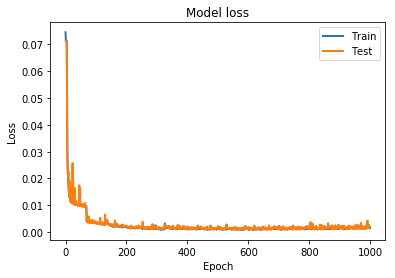

In [16]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

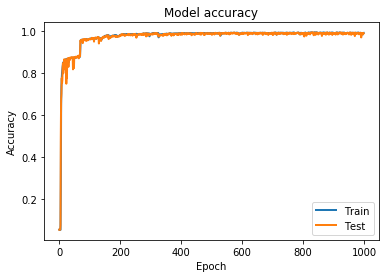

In [17]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()